In [1]:
import json
import pandas as pd

business=[]
with open('../Data/raw/yelp_academic_dataset_business.json',encoding='utf-8') as f:
    for line in f:
        r=json.loads(line)
        catr = r['categories']
        if(catr!=None):
            cat_list=catr.split(', ')
            if('Restaurants' in cat_list or 'Food' in cat_list or 'Bar' in cat_list):
                r['categories']=cat_list
                business.append(r)
    
businessdf = pd.DataFrame(business)
print(businessdf.shape)
print(businessdf.head(1))

(72624, 15)
             address                                         attributes  \
0  1314 44 Avenue NE  {'BikeParking': 'False', 'BusinessAcceptsCredi...   

              business_id                                         categories  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  [Tours, Breweries, Pizza, Restaurants, Food, H...   

      city                                              hours  is_open  \
0  Calgary  {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...        1   

    latitude   longitude                  name neighborhood postal_code  \
0  51.091813 -114.031675  Minhas Micro Brewery                  T2E 6L6   

   review_count  stars state  
0            24    4.0    AB  


In [2]:
vdf=businessdf.loc[businessdf['city'] == 'Las Vegas']
print(vdf.shape)

(7971, 15)


In [3]:
#Removing 'Restaurants','Food','Grocery' & 'Convenience Stores' from categories
def cleanCategories(l):
    if('Restaurants' in l):
        l.remove('Restaurants')
    if('Food' in l):
        l.remove('Food')
    if('Grocery' in l):
        l.remove('Grocery')
    if('Convenience Stores' in l):
        l.remove('Convenience Stores')
    
vdf['categories'].apply(cleanCategories)
vdf=vdf[vdf.astype(str)['categories'] != '[]']
print(vdf.shape)

(7850, 15)


In [4]:
#list of filtered categories
filteredcategories=['Fast Food','Bars','American (Traditional)','Mexican','Coffee & Tea','Pizza','Sandwiches','American (New)',
'Breakfast & Brunch','Chinese','Desserts','Italian','Japanese','Seafood','Bakeries','Asian Fusion','Juice Bars & Smoothies',
'Sushi Bars','Thai','Mediterranean','Hawaiian','Korean','Vietnamese','Latin American','Filipino','French','Southern','Indian',
'Middle Eastern','Greek','Taiwanese','Spanish','Caribbean','Salvadoran','Persian/Iranian','Cuban','Pakistani','Ethiopian',
'Brazilian','Irish','Peruvian','British','African','Lebanese','Mongolian','Nightlife','Burgers','Ice Cream & Frozen Yogurt','Chicken Wings',
'Steakhouses','Barbeque','Sports Bars','Delis','Cocktail Bars','Hot Dogs','Tapas/Small Plates','Tapas Bars','Gastropubs',
 'Cajun/Creole','Ramen','Poke','Dim Sum','Breweries','Cantonese']
print(len(filteredcategories))

64


In [5]:
#list of filtered categories 2
fc2=['Fast Food','Nightlife', 'Bars', 'American (Traditional)','Mexican', 'Coffee & Tea','Sandwiches','Pizza', 'American (New)', 'Burgers', 'Breakfast & Brunch','Chinese','Specialty Food', 'Desserts',
     'Italian', 'Japanese','Seafood','Bakeries','Ice Cream & Frozen Yogurt', 'Asian Fusion', 'Juice Bars & Smoothies', 'Sushi Bars',
     'Beer', 'Wine & Spirits','Chicken Wings','Cafes', 'Salad','Steakhouses', 'Barbeque','Sports Bars', 'Delis','Thai','Mediterranean'
     ,'Hawaiian','Pubs', 'Buffets', 'Korean','Vegetarian',  'Vegan', 'Diners', 'Lounges', 'Cocktail Bars', 'Hot Dogs', 'Vietnamese'
     , 'Latin American', 'Donuts', 'Ethnic Food','Bubble Tea', 'Wine Bars', 'Soup', 'Casinos', 'Filipino', 'Food Stands', 'Tex-Mex', 'Gluten-Free', 'Street Vendors', 'Noodles', 'French', 'Southern', 
'Indian','Bagels','Karaoke','Shaved Ice','Middle Eastern', 'Greek','Tapas/Small Plates', 'Cupcakes','Comfort Food']
print(len(fc2))

68


In [6]:
#filtering businesses using fc2
vdf['categories']=vdf['categories'].map(lambda x : [x1 for x1 in x if x1 in fc2]) #filteredcategories
vdf=vdf[vdf.astype(str)['categories'] != '[]']
print(vdf.shape)
#print(vdf.categories)


(7381, 15)


In [7]:
cuisines={k: v for v, k in enumerate(fc2)} #filteredcategories
print(cuisines)

{'Fast Food': 0, 'Nightlife': 1, 'Bars': 2, 'American (Traditional)': 3, 'Mexican': 4, 'Coffee & Tea': 5, 'Sandwiches': 6, 'Pizza': 7, 'American (New)': 8, 'Burgers': 9, 'Breakfast & Brunch': 10, 'Chinese': 11, 'Specialty Food': 12, 'Desserts': 13, 'Italian': 14, 'Japanese': 15, 'Seafood': 16, 'Bakeries': 17, 'Ice Cream & Frozen Yogurt': 18, 'Asian Fusion': 19, 'Juice Bars & Smoothies': 20, 'Sushi Bars': 21, 'Beer': 22, 'Wine & Spirits': 23, 'Chicken Wings': 24, 'Cafes': 25, 'Salad': 26, 'Steakhouses': 27, 'Barbeque': 28, 'Sports Bars': 29, 'Delis': 30, 'Thai': 31, 'Mediterranean': 32, 'Hawaiian': 33, 'Pubs': 34, 'Buffets': 35, 'Korean': 36, 'Vegetarian': 37, 'Vegan': 38, 'Diners': 39, 'Lounges': 40, 'Cocktail Bars': 41, 'Hot Dogs': 42, 'Vietnamese': 43, 'Latin American': 44, 'Donuts': 45, 'Ethnic Food': 46, 'Bubble Tea': 47, 'Wine Bars': 48, 'Soup': 49, 'Casinos': 50, 'Filipino': 51, 'Food Stands': 52, 'Tex-Mex': 53, 'Gluten-Free': 54, 'Street Vendors': 55, 'Noodles': 56, 'French': 57

In [8]:
#mapping categories as columns for Naive Bayes
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
vdf = vdf.join(pd.DataFrame(mlb.fit_transform(vdf.pop('categories')),
                          columns=mlb.classes_,
                          index=vdf.index))

In [9]:
vdict=vdf.to_dict('records')
print(vdict[0])
print(vdf.shape)

{'address': '3940 Martin Luther King Blvd, Ste 101', 'attributes': {'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsDelivery': 'False'}, 'business_id': 'vJIuDBdu01vCA8y1fwR1OQ', 'city': 'Las Vegas', 'hours': {'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18:0', 'Thursday': '11:0-18:0', 'Friday': '11:0-18:0', 'Saturday': '11:0-17:0'}, 'is_open': 0, 'latitude': 36.1922841, 'longitude': -115.1592718, 'name': 'CakesbyToi', 'neighborhood': '', 'postal_code': '89106', 'review_count': 3, 'stars': 1.5, 'state': 'NV', 'American (New)': 0, 'American (Traditional)': 1, 'Asian Fusion': 0, 'Bagels': 0, 'Bakeries': 1, 'Barbeque': 0, 'Bars': 0, 'Beer': 0, 'Breakfast & Brunch': 0, 'Bubble Tea': 0, 'Buffets': 0, 'Burgers': 0, 'Cafes': 0, 'Casinos': 0, 'Chicken Wings': 0, 'Chinese': 0, 'Cocktail Bars': 0, 'Coffee & Tea': 0, 'Comfort Food': 0, 'Cupcakes': 0, 'Delis': 0, 'Desserts': 0, 'Diners': 0, 'Donuts': 0, 'Ethnic Food': 0, 'Fast Food': 0, 'Filipino': 0, 'Food Stands': 0, 'Frenc

In [10]:
#stars to integer classes for NB
stars=[1,1.5,2,2.5,3,3.5,4,4.5,5]
ustars={k: v+10 for v, k in enumerate(stars)}
revstars={v+10: k for v, k in enumerate(stars)}
print(ustars)
print(revstars)
vdf=vdf.replace({"stars": ustars})

{1: 10, 1.5: 11, 2: 12, 2.5: 13, 3: 14, 3.5: 15, 4: 16, 4.5: 17, 5: 18}
{10: 1, 11: 1.5, 12: 2, 13: 2.5, 14: 3, 15: 3.5, 16: 4, 17: 4.5, 18: 5}


Average accuracy with 5-fold cross validation:  0.27682926829268295
Average accuracy for random classifier (3.5 for all):  0.22886178861788622
On plotting 50 test samples (Predictions in blue)


Text(0, 0.5, 'Stars')

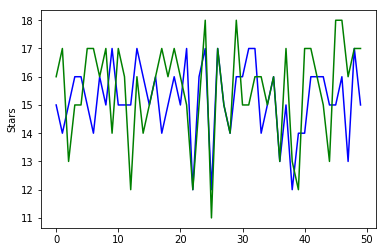

In [15]:
#NB to predict star ratings given categories

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

num_folds = 5
subset_size = int(len(vdf)/num_folds)
acc=0.0
random_acc=0.0  #on assigning 3.5 stars
nb = BernoulliNB() #MultinomialNB() #MultinomialNB(alpha=0.0, fit_prior=True, class_prior=None)
for i in range(num_folds):
    X_train, X_test = train_test_split(vdf,test_size=subset_size)  
    used_features =  fc2 #filteredcategories
#Train classifier
    nb.fit(X=X_train[used_features].values,y=X_train['stars'].values)
    y_true = X_test['stars']
    y_pred = nb.predict(X_test[used_features])
    y_rand=np.zeros((len(y_true)))
    y_rand.fill(15)
    acc+=accuracy_score(y_true,y_pred)
    random_acc+=accuracy_score(y_true,y_rand)
    #print(classification_report(y_true, y_pred))
    yt=y_true.tolist()
    yp=y_pred.tolist()
    #print(yt[0:5], yp[0:5])
print("Average accuracy with 5-fold cross validation: ",acc/num_folds)
print("Average accuracy for random classifier (3.5 for all): ",random_acc/num_folds)

print("On plotting 50 test samples (Predictions in blue)")
plt.plot(yp[:50],color='blue')
plt.plot(yt[:50],color='green')
plt.ylabel('Stars')

In [18]:
#adding price column
vdf['Price']=0
print(vdf.shape)

def getprice(y):
    l = y.attributes
    price=0
    if l!=None and 'RestaurantsPriceRange2' in l.keys():
        price=l['RestaurantsPriceRange2']
    y.loc['Price']=price
    return y
        

vdf.apply(lambda x: getprice(x),axis=1)

(7381, 83)


,address,attributes,business_id,city,hours,is_open,latitude,longitude,name,neighborhood,...,Sushi Bars,Tapas/Small Plates,Tex-Mex,Thai,Vegan,Vegetarian,Vietnamese,Wine & Spirits,Wine Bars,Price
13,"3940 Martin Luther King Blvd, Ste 101","{'BikeParking': 'True', 'BusinessAcceptsCredit...",vJIuDBdu01vCA8y1fwR1OQ,Las Vegas,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",0,36.192284,-115.159272,CakesbyToi,,...,0,0,0,0,0,0,0,0,0,0
22,2255 N Rampart Blvd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",kgffcoxT6BQp-gJ-UQ7Czw,Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.201794,-115.281981,Subway,Summerlin,...,0,0,0,0,0,0,0,0,0,1
23,2227 N Rampart Blvd,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",0jtRI7hVMpQHpUVtUy4ITw,Las Vegas,"{'Monday': '7:0-14:30', 'Tuesday': '7:0-19:0',...",1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,...,0,0,0,0,0,0,0,1,0,2
34,7930 W Tropical Pkwy,"{'HasTV': 'False', 'RestaurantsReservations': ...",JJEx5wIqs9iGGATOagE8Sg,Las Vegas,None,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,...,0,0,0,0,0,0,0,0,0,0
38,5115 Spring Mountain Rd,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",coVhQD_EAnCof_a8sGM03g,Las Vegas,None,0,36.125587,-115.211199,Provence Bakery,Chinatown,...,0,0,0,0,0,0,0,0,0,1
62,4505 E Bonanza Rd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",zhxnD7J5_sCrKSw5cwI9dQ,Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.173140,-115.077945,Popeyes Louisiana Kitchen,Sunrise,...,0,0,0,0,0,0,0,0,0,1
64,"560 N. Nellis Blvd, Ste E1","{'Alcohol': 'none', 'Ambience': '{'romantic': ...",2kWrSFkIes_d2BMg4YrRtA,Las Vegas,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.169353,-115.061694,Pizza Hut,Sunrise,...,0,0,0,0,0,0,0,0,0,2
65,3480 S Maryland Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",6llKs7K_tn8ChXcIM-oTvg,Las Vegas,None,1,36.125934,-115.135253,Sansei Japan,Eastside,...,0,0,0,0,0,0,0,0,0,1
73,6400 SE Centennial Center Blvd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",nqnYDW_FMwuTejAPNEOhqA,Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1,36.274733,-115.268934,Seasonal Adventures Pumpkin Patch,Centennial,...,0,0,0,0,0,0,0,0,0,0
85,2505 E Tropicana Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",YV9GVfmDSDM7HSV0jVdTOA,Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.099671,-115.116144,El Pollo Loco,Southeast,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#adding 'Price' to list of features to be considered for NB

#filteredcategories.extend(prices)
#print(filteredcategories)
fc2.extend(['Price']) 
print(fc2)

['Fast Food', 'Nightlife', 'Bars', 'American (Traditional)', 'Mexican', 'Coffee & Tea', 'Sandwiches', 'Pizza', 'American (New)', 'Burgers', 'Breakfast & Brunch', 'Chinese', 'Specialty Food', 'Desserts', 'Italian', 'Japanese', 'Seafood', 'Bakeries', 'Ice Cream & Frozen Yogurt', 'Asian Fusion', 'Juice Bars & Smoothies', 'Sushi Bars', 'Beer', 'Wine & Spirits', 'Chicken Wings', 'Cafes', 'Salad', 'Steakhouses', 'Barbeque', 'Sports Bars', 'Delis', 'Thai', 'Mediterranean', 'Hawaiian', 'Pubs', 'Buffets', 'Korean', 'Vegetarian', 'Vegan', 'Diners', 'Lounges', 'Cocktail Bars', 'Hot Dogs', 'Vietnamese', 'Latin American', 'Donuts', 'Ethnic Food', 'Bubble Tea', 'Wine Bars', 'Soup', 'Casinos', 'Filipino', 'Food Stands', 'Tex-Mex', 'Gluten-Free', 'Street Vendors', 'Noodles', 'French', 'Southern', 'Indian', 'Bagels', 'Karaoke', 'Shaved Ice', 'Middle Eastern', 'Greek', 'Tapas/Small Plates', 'Cupcakes', 'Comfort Food', 'Price']


KFold(n_splits=5, random_state=None, shuffle=False)
Classification report
              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00        25
        12.0       0.30      0.27      0.29        99
        13.0       0.25      0.19      0.22       170
        14.0       0.21      0.11      0.15       211
        15.0       0.27      0.41      0.32       337
        16.0       0.33      0.39      0.36       368
        17.0       0.22      0.19      0.20       199
        18.0       0.32      0.10      0.15        61

   micro avg       0.28      0.28      0.28      1477
   macro avg       0.21      0.18      0.19      1477
weighted avg       0.26      0.28      0.26      1477

Classification report
              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00        37
        12.0       0.23      0.10   

c:\users\joshi\applications\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\joshi\applications\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\joshi\applications\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\joshi\applications\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

Text(0, 0.5, 'Stars')

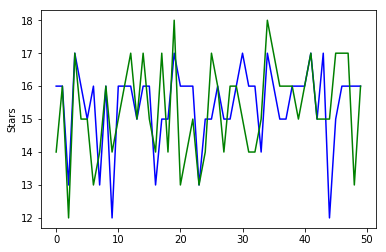

In [20]:
# NB to predict star ratings given price and categories
acc=0.0
acc2=0.0
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
X = vdf[fc2]
y = vdf['stars']
kf = KFold(n_splits=5)  
no=kf.get_n_splits(X)
print(kf) 
nb = MultinomialNB(alpha=1, class_prior=None, fit_prior=True) 

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb.fit(X=X_train.values,y=y_train.values)
    y_true = y_test
    y_pred = nb.predict(X_test)
    yt=y_true.tolist()
    yp=y_pred.tolist()

    y_rand=np.zeros((len(y_true)))
    y_rand.fill(15)
    acc+=accuracy_score(y_true,y_pred)
    acc2+=accuracy_score(y_true,y_rand)
    print("Classification report")
    print(classification_report(y_true,y_pred))
    #print(yt[0:5], yp[0:5])

print("Average accuracy with 5-fold cross validation: ",acc/no)
print("Average accuray for random classifier ",acc2/no)
print("On plotting 50 test samples (Predictions in blue)")
plt.plot(yp[:50],color='blue')
plt.plot(yt[:50],color='green')
plt.ylabel('Stars')